<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/ML_dummy_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#you can change any categorical variable into a dumym_variable to split each possibility into a column,
#through process of elimination we elimnate the first option.
#numeric variables cant have dummies. only categorical.
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('student.csv')
df.tail()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

In [ ]:
len(df)

1000

In [ ]:
df.columns.values
#summarizes your variables

array(['gender', 'ethnicity', 'parental_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   ethnicity                1000 non-null   object
 2   parental_education       1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# i want to drop one column -> 'lunch'
#1st- new data frame
dropped_df = df.drop('lunch', axis=1)
#used df.drop;  axis=1
dropped_df.head()


,gender,ethnicity,parental_education,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [ ]:
dropped_df['lunch'] = 0
dropped_df.tail()

,gender,ethnicity,parental_education,test_preparation_course,math_score,reading_score,writing_score,lunch
995,female,group E,master's degree,completed,88,99,95,0
996,male,group C,high school,none,62,55,55,0
997,female,group C,high school,completed,59,71,65,0
998,female,group D,some college,completed,68,78,77,0
999,female,group D,some college,none,77,86,86,0


In [ ]:
del dropped_df['lunch']
#>>>if you run this twice, you won't have a 'lunch' to delete!

In [ ]:
dropped_df.head()

,gender,ethnicity,parental_education,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [ ]:
#create dummy variable for 'gender'
dummied_df = pd.get_dummies(df, columns=['gender'], drop_first=True)
dummied_df.head()
#this split gender into 'dummy variables'

,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,0
1,group C,some college,standard,completed,69,90,88,0
2,group B,master's degree,standard,none,90,95,93,0
3,group A,associate's degree,free/reduced,none,47,57,44,1
4,group C,some college,standard,none,76,78,75,1


In [ ]:
#next we're going to FILTER the data
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [ ]:
#create dummy variable for ethnicity
dummied_df2 = pd.get_dummies(dummied_df, columns=['ethnicity'], drop_first=True)
dummied_df2.head()

,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E
0,bachelor's degree,standard,none,72,72,74,0,1,0,0,0
1,some college,standard,completed,69,90,88,0,0,1,0,0
2,master's degree,standard,none,90,95,93,0,1,0,0,0
3,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0
4,some college,standard,none,76,78,75,1,0,1,0,0


In [ ]:
##^could also
# dummied_df = pd.get_dummies(df, columns=['ethnicity','gender'], drop_first=True)
#dummied_df.head()
#you have less databases this way, but you cant go back and check your work

In [ ]:
#next were going to filter the data
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [ ]:

#refine data and select students who are from group b
#this makes a data frame with only group B in a new dataframe
refined_df = df.loc[df['ethnicity'] == 'group B']
#loc is for location                          ^ check for caps...
refined_df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [ ]:

#refine data and select students who are from group b
refined_df = df.loc[(df['gender'] == 'female') & (df['ethnicity'] == 'group B')]
#loc is for location                          ^ check for caps...
refined_df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
len(refined_df)

104

<Axes: xlabel='math_score'>

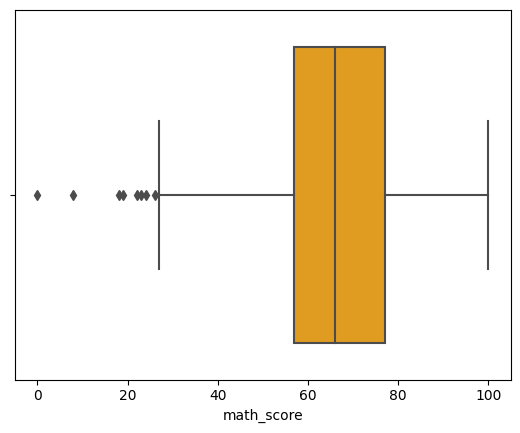

In [ ]:
#how to find the distribution of math score using box plot
sns.boxplot(data=df, x='math_score', color='Orange')